# Implementation of MCP Neuron for AND and OR Function.

In [5]:
def MCP_Neurons_AND(X1, X2, T):
  """
  This functions implements basic AND operations with MCP Neuron for two inputs.
  Arguments:
  Inputs:
  X1 (1 nd array): An array of binary values.
  X2 (1 nd array): An array of binary values.
  Output:
  state_neuron(1D-list): An state of neuron 1 0r 0 for the particular inputs.
  """
  assert len(X1) == len(X2)
  state_neuron = []
  for ele1, ele2 in zip(X1, X2):
    sum = ele1 + ele2
    if sum >= T:
      state_neuron.append(1)
    else:
      state_neuron.append(0)


  return state_neuron

In [6]:
# Example usage for MCP_Neurons_AND function
X1 = [0, 0, 1, 1]
X2 = [0, 1, 0, 1]
T = 2  # Threshold value

# Call the MCP_Neurons_AND function
result = MCP_Neurons_AND(X1, X2, T)

# Print the result
print(f"Output of AND gate for inputs {X1} and {X2} with threshold {T}: {result}")


Output of AND gate for inputs [0, 0, 1, 1] and [0, 1, 0, 1] with threshold 2: [0, 0, 0, 1]


In [7]:
def MCP_Neurons_OR(X1, X2, T):
    """
    This function implements basic OR operations with MCP Neuron for two inputs.
    Arguments:
    Inputs:
    X1 (1D array): An array of binary values.
    X2 (1D array): An array of binary values.
    Output:
    state_neuron (1D list): The state of the neuron (1 or 0) for the particular inputs.
    """
    assert len(X1) == len(X2)

    for ele1, ele2 in zip(X1, X2):
        sum = ele1 + ele2
        state_neuron = []
        if sum >= T:
            state_neuron.append(1)
        else:
            state_neuron.append(0)

    return state_neuron


In [8]:
# Example usage for MCP_Neurons_OR function
X1 = [0, 0, 1, 1]
X2 = [0, 1, 0, 1]
T = 1  # Threshold value for OR gate

# Call the MCP_Neurons_OR function
result_or = MCP_Neurons_OR(X1, X2, T)

# Print the result
print(f"Output of OR gate for inputs {X1} and {X2} with threshold {T}: {result_or}")


Output of OR gate for inputs [0, 0, 1, 1] and [0, 1, 0, 1] with threshold 1: [1]


##Answer the following Questions:



1.   List out all the limitations of MCP Neurons.
     
     The limitations of MCP neurons are:


*   They produce only binary outputs limiting their ability to model real world scenarios that require continuous or probabilistic output.
*   They can only solve problems that are linearly separable but cannot solve problems like XOR, which requires non-linear separation.

*   They have no internal memory or time-dependent behavior.
*   There is no  learning rule in MCP neurons to adjust weights based on errors or feedback.









2. Think if you can develop a logic to solve for XOR function using MCP Neuron.
{Can you devise a if else rules.}

      Logical Expression of XOR

        XOR = (A.B')+(A'.B)

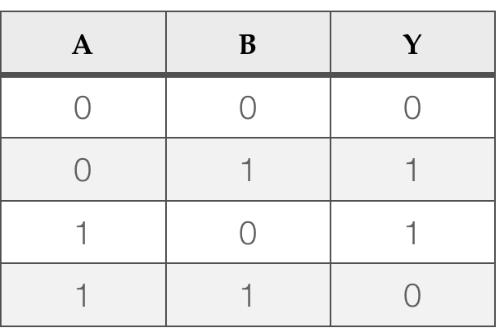

          def XOR(A,B):
              if A==B:
                  return 0
              else:
                  return 1

# Implementation for 0 Vs. 1 Classification.

## Step 1: Load the Dataset

In [9]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# Load the dataset
df_0_1 = pd.read_csv("/content/drive/MyDrive/AI and ML/mnist_0_and_1.csv")

# Extract features and labels
X = df_0_1.drop(columns=["label"]).values  # 784 pixels
y = df_0_1["label"].values  # Labels (0 or 1)

# Check the shape of the features and labels
print("Feature matrix shape:", X.shape)
print("Label vector shape:", y.shape)


Feature matrix shape: (12665, 784)
Label vector shape: (12665,)




1.   What does the shape of X represent?

     The shape of X represent feature matrix.

2.   What does the shape of Y represent?

     The shape of Y represent label vector.



### Viewing the Dataset.

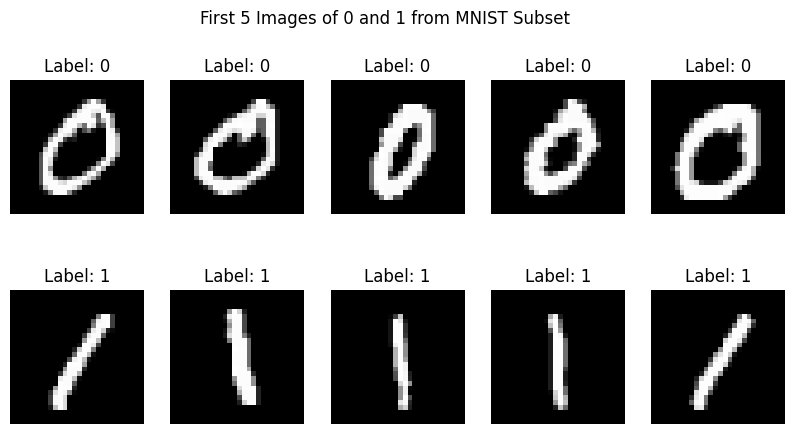

In [11]:
# Separate images for label 0 and label 1
images_0 = X[y == 0]  # Get all images with label 0
images_1 = X[y == 1]  # Get all images with label 1

fig, axes = plt.subplots(2, 5, figsize=(10, 5))

# Check if the arrays have the required amount of data
if len(images_0) < 5 or len(images_1) < 5:
    print("Error: Not enough images in images_0 or images_1 to plot 5 images.")
else:
    for i in range(5):
        # Plot digit 0
        axes[0, i].imshow(images_0[i].reshape(28, 28), cmap="gray")
        axes[0, i].set_title("Label: 0")
        axes[0, i].axis("off")
        # Plot digit 1
        axes[1, i].imshow(images_1[i].reshape(28, 28), cmap="gray")
        axes[1, i].set_title("Label: 1")
        axes[1, i].axis("off")
    plt.suptitle("First 5 Images of 0 and 1 from MNIST Subset")
    plt.show()

## Step - 2 - Initializing the Weights:

In [12]:
# Initialize weights and bias
weights = np.zeros(X.shape[1])  # 784 weights (one for each pixel)
bias = 0
learning_rate = 0.1
epochs = 100

**1. What does the weights array represent in this context?**

The weight repesent coefficients assigned to each pixel in the input data.  Since the input data is a set of images each weight corresponds to a pixel in the image. The weights determine how much each pixel contributes to the model's decision-making process. In essence, they help the model learn which pixels are most relevant for distinguishing between different classes.

**2. Why are we initializing the weights to zero? What effect could this
have on the training process?**

We are initializing the weights to zero because it is a simple approach.
The effect this would have on the training process are:



*   The model might take longer to converge or might converge to a suboptimal solution.
*   The risk of getting stuck in local minima increases.



## Step - 3 - Make a Decision function:

In [13]:
import numpy as np

def decision_function(X, weights, bias):
    """
    Compute the predicted labels for the input data.

    Parameters:
    - X: Features (input data) as a numpy array of shape (n_samples, n_features)
    - weights: Updated weights after training
    - bias: Updated bias after training

    Returns:
    - y_pred_all: The predicted labels for the input data
    """
    predictions = np.dot(X, weights) + bias
    y_pred_all = np.where(predictions >= 0, 1, 0)
    return y_pred_all

## Step - 3 - Implement the Perceptron Learning Algorithm

In [14]:
def train_perceptron(X, y, weights, bias, learning_rate=0.1, epochs=100):
    """
    Train the perceptron using the Perceptron Learning Algorithm.

    Parameters:
    - X: Features (input data) as a numpy array of shape (n_samples, n_features)
    - y: Labels (true output) as a numpy array of shape (n_samples,)
    - weights: Initial weights as a numpy array of shape (n_features,)
    - bias: Initial bias value (scalar)
    - learning_rate: Learning rate for weight updates (default is 0.1)
    - epochs: Number of iterations to train the model (default is 100)

    Returns:
    - weights: Updated weights after training
    - bias: Updated bias after training
    - accuracy: Total correct prediction.
    """
    # Step 3: Perceptron Learning Algorithm
    for epoch in range(epochs):
      correct_predictions = 0
      for i in range(len(X)):
         predictions = decision_function(X[i], weights, bias)
         error = y[i] - predictions

         weights += learning_rate * error * X[i]
         bias += learning_rate * error

         if error == 0:
          correct_predictions += 1
          accuracy = correct_predictions / len(X)

      if (epoch+1)% 10 ==0:
        print(f"Epoch {epoch+1},Accuracy = {accuracy:.4f}")

    return weights, bias, accuracy

**What is the purpose of the output = np.dot(X[i], weights) + bias line?**


The purpose of output = np.dot(X[i], weights) + bias is to represent linear combination of inputs and weights which is then passed through the activation function to make a prediction.

**What happens when the prediction is wrong? How are the weights and
bias updated?**

When the prediction is wrong, the error is calculated as the difference between the actual label and the predicted label.

The weights and bias are updated using this formula:

weights += learning_rate * error * X[i]

bias += learning_rate * error


**Why is the final accuracy important, and what do you expect it to be?**

Final accuracy is important because it tells you how well the perceptron model has learned from the data.

I expect it to be high accuracy since it's a linearly separable problem.

## Training the Perceptron

In [15]:
# After training the model with the perceptron_learning_algorithm
weights, bias, accuracy = train_perceptron(X, y, weights, bias)

# Evaluate the model using the new function
print("The Final Accuracy is: ", accuracy)

Epoch 10,Accuracy = 0.9992
Epoch 20,Accuracy = 1.0000
Epoch 30,Accuracy = 1.0000
Epoch 40,Accuracy = 1.0000
Epoch 50,Accuracy = 1.0000
Epoch 60,Accuracy = 1.0000
Epoch 70,Accuracy = 1.0000
Epoch 80,Accuracy = 1.0000
Epoch 90,Accuracy = 1.0000
Epoch 100,Accuracy = 1.0000
The Final Accuracy is:  1.0


## Step 5: Visualize Misclassified Images

In [16]:
# Get predictions for all data points
predictions = np.dot(X, weights) + bias
y_pred = np.where(predictions >= 0, 1, 0)

# Calculate final accuracy
final_accuracy = np.mean(y_pred == y)
print(f"Final Accuracy: {final_accuracy:.4f}")

# Step 5: Visualize Misclassified Images
misclassified_idx = np.where(y_pred != y)[0]
if len(misclassified_idx) > 0:
    fig, axes = plt.subplots(2, 5, figsize=(10, 5))
    for ax, idx in zip(axes.flat, misclassified_idx[:10]):  # Show 10 misclassified images
        ax.imshow(X[idx].reshape(28, 28), cmap="gray")
        ax.set_title(f"Pred: {y_pred[idx]}, True: {y[idx]}")
        ax.axis("off")
    plt.suptitle("Misclassified Images")
    plt.show()
else:
    print("All images were correctly classified!")

Final Accuracy: 1.0000
All images were correctly classified!


**What does misclassified idx store, and how is it used in this code?**

The misclassified idx keeps the track of the position in data where the model made a wrong prediction.

It is used to show the first 10 images that were incorrectly classified.

**How do you interpret the result if the output is ”All images were
correctly classified!”?**

It means that the model got every prediction correct.

## Implementation for 3 Vs 5

##  Classification

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df_3_5 = pd.read_csv("/content/drive/MyDrive/AI and ML/mnist_3_and_5.csv")

X = df_3_5.drop(columns=["label"]).values
y = df_3_5["label"].values

print("Feature matrix shape:", X.shape)
print("Label vector shape:", y.shape)

Feature matrix shape: (2741, 784)
Label vector shape: (2741,)


##Viewing Dataset

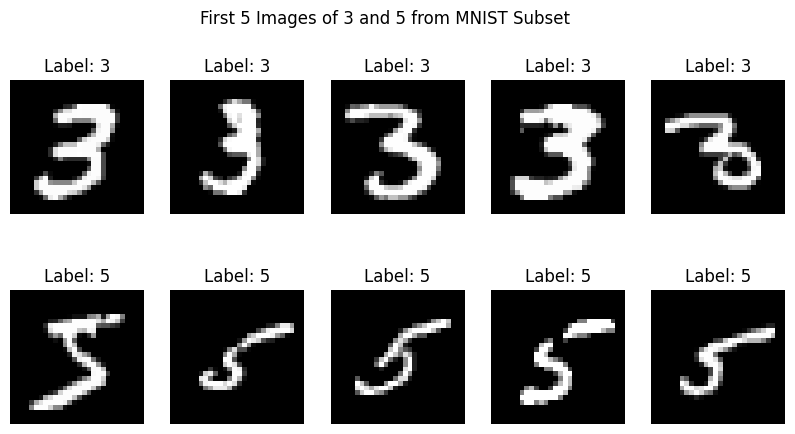

In [18]:
image_3 = X[y==3]
image_5 = X[y==5]

fig, axes = plt.subplots(2, 5, figsize=(10, 5))

if len(image_3) < 5 or len(image_5) < 5:
    print("Error: Not enough images in image_3 or image_5 to plot 5 images.")
else:
    for i in range(5):

        axes[0, i].imshow(image_3[i].reshape(28, 28), cmap="gray")
        axes[0, i].set_title("Label: 3")
        axes[0, i].axis("off")

        axes[1, i].imshow(image_5[i].reshape(28, 28), cmap="gray")
        axes[1, i].set_title("Label: 5")
        axes[1, i].axis("off")

    plt.suptitle("First 5 Images of 3 and 5 from MNIST Subset")
    plt.show()

##Initializing Weights

In [19]:
weights = np.zeros(X.shape[1])
bias = 0
learning_rate = 0.1
epochs = 100

##Decision Function

In [26]:
import numpy as np

def decision_function(X, weights, bias):
    """
    Compute the predicted labels for the input data.

    Parameters:
    - X: Features (input data) as a numpy array of shape (n_samples, n_features)
    - weights: Updated weights after training
    - bias: Updated bias after training

    Returns:
    - y_pred_all: The predicted labels for the input data
    """

    predictions = np.dot(X, weights) + bias
    y_pred_all = np.where(predictions >= 0,5,3 )

    return y_pred_all

##Implement perceptron
##learning Algorithm



In [32]:
def train_perceptron(X, y, weights, bias, learning_rate=0.1, epochs=100):
    """
    Train the perceptron using the Perceptron Learning Algorithm.

    Parameters:
    - X: Features (input data) as a numpy array of shape (n_samples, n_features)
    - y: Labels (true output) as a numpy array of shape (n_samples,)
    - weights: Initial weights as a numpy array of shape (n_features,)
    - bias: Initial bias value (scalar)
    - learning_rate: Learning rate for weight updates (default is 0.1)
    - epochs: Number of iterations to train the model (default is 100)

    Returns:
    - weights: Updated weights after training
    - bias: Updated bias after training
    - accuracy: Total correct prediction.
    """
    # Step 3: Perceptron Learning Algorithm
    # Your Code here#
    for epoch in range(epochs):
      correct_predictions = 0
      for i in range(len(X)):
        predictions = decision_function(X[i], weights, bias)
        error = y[i] - predictions

        weights += learning_rate * error * X[i]
        bias += learning_rate * error

        if error == 0:
          correct_predictions += 1
      accuracy = correct_predictions / len(X)

      if (epoch+1)% 10 ==0:
        print(f"Epoch {epoch+1},Accuracy = {accuracy:.4f}")
    return weights, bias, accuracy

##Training Perceptron

In [33]:
weights, bias, accuracy = train_perceptron(X, y, weights, bias)

print("The Final Accuracy is: ", accuracy)

Epoch 10,Accuracy = 0.4586
Epoch 20,Accuracy = 0.4586
Epoch 30,Accuracy = 0.4586
Epoch 40,Accuracy = 0.4586
Epoch 50,Accuracy = 0.4622
Epoch 60,Accuracy = 0.5100
Epoch 70,Accuracy = 0.6279
Epoch 80,Accuracy = 0.7246
Epoch 90,Accuracy = 0.7895
Epoch 100,Accuracy = 0.8249
The Final Accuracy is:  0.8248814301349873


## Visualize Misclassified Images

Final Accuracy: 0.8267


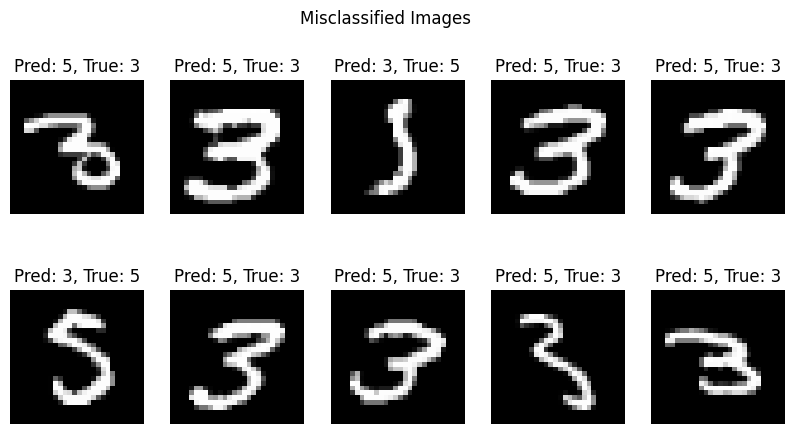

In [34]:
# Get predictions for all data points
predictions = np.dot(X, weights) + bias
y_pred = np.where(predictions >= 0, 5, 3)

# Calculate final accuracy
final_accuracy = np.mean(y_pred == y)
print(f"Final Accuracy: {final_accuracy:.4f}")

# Step 5: Visualize Misclassified Images
misclassified_idx = np.where(y_pred != y)[0]
if len(misclassified_idx) > 0:
    fig, axes = plt.subplots(2, 5, figsize=(10, 5))
    for ax, idx in zip(axes.flat, misclassified_idx[:10]):  # Show 10 misclassified images
        ax.imshow(X[idx].reshape(28, 28), cmap="gray")
        ax.set_title(f"Pred: {y_pred[idx]}, True: {y[idx]}")
        ax.axis("off")
    plt.suptitle("Misclassified Images")
    plt.show()
else:
    print("All images were correctly classified!")

**Conclusion**

The model shows a final accuracy of 82.67%, meaning the model correctly classified around 83% of the test images.It also shows misclassified images where the predicted label differs from true label.Many images of the digit 3 were incorrectly classified as 5 and some images of 5 were misclassified as 3.
